In [31]:
!python --version

Python 3.10.10


# Practicing creating synthetic data

In [32]:
# This is a made up DNA sequence using a pseudorandom algorithm 
import random # come forth variables and functions from the module
'''This just allows me to make up an artifical dna sequence with 1000 reads'''
dna = "" # an empty string, which will be populated by a long string
for _ in range(20000): # for nothing in the range 0 - 20000, this is loop
    dna += random.choice("ACGT") # storing the results back into variable for future use
print("".join(dna)); "It's definately " + str(len(dna)) # concatenating the string and confirming the no of characters

GTAACGCTGGATAAGCCTCATGGAAAAGCGGGACCGTTTAGCCTGGTAACCGAAGGGACTATCAAATAGGTGGCGCACGTGCCGTGTCATTTGAAAACCGTGCCGTTTCGCTGCGGACGTGTCTGCGACATTCGGCACAGCATTACAACCCGCGTACACGCCCGTAGTTCAAGTTAATGTGTTTAAGAGTAACAAAAAGGGTTTCTCTGTGCTGTAGAGTCCACCCGGTGCTGTGGTTCTTTCATCAATTGCATGTCACAAGGCTTCCTTTAATAAGAAATGGTAATCGAAAGATCAAGATGCCCCAGGGTCCAAGACGATATTTCTACAACGAACCAGCGTCGGATGGGTACTGGTGAATGTCGGTTTTGTAGTAGCTCGACTTATTTTCTAGAAAGGTAGCACGGAGGCAAACAACTCATTAGTAGAATAACGCCTCGCATGTACTCTTGGCGATACCGTCTGCCATATGGGAGGACAAAGCGTACTCACCCTCCAGCCTGTGTACATGCCCCTACGCAGATCTTACTGGGCACCCTGGTAGACGCTAATGCGAGAGTATGTTAGGCTATATAGATTAAACGTGGCTCAGCGACACGGTCTGAGTTCATCAATCGTCACTAACTGCCTTCAAATCAGATGCTCCTAATTCACTATTGAGCACACGACCGGCCCTCCCGCCGTAGCAGACGAGTAATATGTGTCCCCGAAAATTCACTTGGCGAACAACTAATCCTGCATGCCATGGCATCCTGGTTGATTAGACCGTGTCTCGCCAGAAGGCACTGGCTTGTCGTCGAGTTAGCCCTTTTTTAAAGCCAGCTTCTGCTTTTAGGTGGCTAAGGACTCGCCAGCGGATCGTTCCGGGGCTTGTCGCCTAGCCCCGTGGTATGGGGTGGATACACTCTCGAGATTGGTCCAGCTTGTCACTCCCACCTATTTGACTATAACAGTGTTATCTTCCCGTCAGTTGGAAGATGAAGAGCACGAGCCCCCCTCC

"It's definately 20000"

In [33]:
# I used this commmand to make up my own dna file. yay!
'''Don't run this command again though, you already made a file, i want us to get the same results'''
myfile = open("dna.txt","w")
myfile.write(dna)
    

20000

In [34]:
# opening a file for further manipulation
newfile = open("data/dna_20000.txt")


# Core functions in Genomic Data Science

1: GC content   
2: Read FASTA files   
3: Read FASTQ files   


In [35]:

'''
this is a python program that computes the gc content from the pseudocode and a function to automates the whole process
'''

# read DNA sequence from the user or use raw_input
dna = "atcggcgcacgctcgcgcggcgatagctgatcggctttttttttaaaag"

# count the number of C's in the dna sequence
no_g = dna.count("c")

# count the number of G's in the dna sequence
no_c = dna.count("g")

# Determine the length of the dna sequence
dna_length = len(dna)

# Compute the GC%
gc_percent = (no_c+no_g) * 100.0 /dna_length

def gc(dna):
	"""
	Compute the GC percentage of a DNA sequence.

	Parameters
	----------
	dna : str
		The DNA sequence to compute the GC percentage of.

	Returns
	-------
	float
		The GC percentage of the DNA sequence.

	Notes
	-----
	This function counts the number of 'c', 'C', 'g', and 'G' characters in the DNA sequence and divides by the total
	length of the sequence minus the number of 'n' and 'N' characters.

	Examples
	--------
	>>> gc('ATCG')
	50.0
	>>> gc('ATNNCG')
	33.333333333333336
	"""
	ns = dna.count('n') + dna.count('N')
	gcpercent = float(dna.count('c') + dna.count('C') + dna.count('g') + dna.count('G')) * 100 // (len(dna) - ns)
	return gcpercent

# making the output understandable
dna = input("Enter your DNA sequence, please :") # don't include the brackets it will throw an error
print (gc(dna)) # see your results


50.0


In [38]:
# use biopython to find the gc content of a sequence
from Bio.SeqUtils import gc_fraction

# gc_fraction is a function that takes a sequence as an argument and returns the gc content
gc_fraction(dna)

0.5

In [28]:
def readgenome(filename):
    """
    Read a genome from a file.

    Parameters
    ----------
    filename : str
        The name of the file containing the genome.

    Returns
    -------
    str
        The genome sequence.

    Notes
    -----
    This function reads a genome from a file and returns it as a string. It removes any newline characters from the
    string before returning it.

    Examples
    --------
    >>> genome = readgenome('genome.txt')
    """
    genome = ''
    with open(filename, 'r') as filehandle:
        for line in filehandle:
            genome += line.rstrip()
    return genome # spit out the result of the function

string = readgenome('data/dna_20000.txt') # added the file you wanted to read in the function and storing the result
ecoli = string[10143: 11143] # string slicing to get 1000 characters for the ecoli genome
print (ecoli) ; print ("") # Confirmatory test if function is working the right way
print(f"Yeah, you got it's {len(ecoli)}")

TTGATGGTTCAGCCTCTCACGTCCACATAAGCGAATAACCTACGTACGATCGATAGCAGGCCCACTCACATAAAACTAAGAGTCACTTGAGTTCAGCTGCGGCCGAGTATGAAAAGCCGTGGTGACGACGGCTGCCACTGCGTCCCTTCAATCCTCTAATCGGGTGCACGTAAAGACCGGTAAGCTGGAGCGTAGGCCTTGTGCTCCGCACCAACGACACTCAGTCTCGTCCGAGTAGTGAGTTTCTCCATTTGATCTTTGGCTTAGAGAGGAGCCCGAGATCGAACGGATGATAGAGGTGTGTCCAGGCCTCGGGTTGACAAGGGGAACGGAGGACCTAAGGTTGACTCCCGACTGGGGCGGGGTTACTGTACCCATCTGCGGGACTATAGATGGGAGCTTCCGTCTGGGCAGGGCCTGGCTTGGCTAATGAGTAAACGTCGTCCGCATCCAGGAAATTTAACCAAGGATGTTAGTATGCAAAACGCTTGGCATTAAACGAGCAACCCTTAATGTTTTGTCTACGGCATTGCTAGGACCCACCGACGCGTACCTCTGCAGGCCGCTTTCCAGCCCCCTCCGAAACGGCAGCTACTAGTTCTGGTGCATTGAGTACCCACTCGTACTGGGAGCTGATCAATTATATAAGAATATATTACAGCAATCTGTAACTTGGGTTAATCCTCGCTAGCGGCTACAGATTGCGAAATCAAATATACCGGGCAGCTTTGACCGAGACCGAGGAAGATTAACAATGATCTCGGATAATCTGGATGCGGCTAGCGCCGGCGCTCATGGGCAAAGGCGTCACCAACGAGTGCGTCACCAATTGTGCGGGGTCGTGAAGGCTACGCTTTCGGATACCCCAGCTAAACGTAAAGATAGGGCGGCAAATCTCCCTATTTTCTTTCCACCCTGAGCTCGACACGAGACAGGCGGCGATGTAGGAATCAACGCTGGTTACTCTCGGGGCGCCGTAATGGATTAAACAACGCTTTAC

In [21]:
def readFASTA(filename):
    """
    Read a FASTA file and extract the genome sequence.

    Parameters
    ----------
    filename : str
        The name of the FASTA file to read.

    Returns
    -------
    str
        The genome sequence.

    Notes
    -----
    This function reads a FASTA file and extracts the genome sequence. It removes any header lines from the file and
    concatenates the remaining lines to form the genome sequence.

    Examples
    --------
    >>> genome = readFASTA('genome.fasta')
    """
    genome = '' # storing the result
    with open(filename, 'r') as filehandle: # read any file and store in a filehandle
        for line in filehandle: # going through all the characters in the filehandle
            if not line[0] == '>': # ignore header line with genome information
                genome += line.rstrip() # trims of special characters like the new line character
    return genome # spit out the result of the function


genome1 = readFASTA('data/chr-1.fasta') # appling function to our files and storing the results
genome2 = readFASTA('data/ecoli.fasta') # appling function to our files and storing the results
chr1 = genome1[10143: 11143]  # Taking the same sample in each genome and storing the results
ecoli =  genome2[10143:11143] # Taking the same sample in each genome and storing the results
print(chr1); print("") # Is the function working and print a space 
print(ecoli); print("") # Is the function working and print a space 
print("chr1 is " + str(len(chr1)) + " and " +" ecoli is " + str(len(ecoli))) # making the output understandable
print("You're asking me alot of questions today :3")

TAACCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCAACCCTAACCCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTCGCGGTACCCTCAGCCGGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAATCTGTGCAGAGGACAACGCAGCTCCGCCCTCGCGGTGCTCTCCGGGTCTGTGCTGAGGAGAACGCACCTCCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGACACATGCTAGCGCGTCCAGGGGGGTGGAGGCGTGGCGCAGGCGCAGAGACGCACGCCTACGGGCGGGGGGTGGGGGTGCGTGTGTTGCAGGAGCAAAGTCGCACGGCGCCGGGCTGGGGGCGGGGGGCCGTGCACGCGCAGAAACTCACGTCACGGCGGCGCGGCGCAGAGACGGGTGGAACCTCAGTAATCCGAAACGCCGGGATCGACAGCCCCTTGCTTGCAGCCGGGCACGACAGGACCCGCTTGCTCACGGTGCTGTGCCAGGGCGCCCCCTGCTGGCGACTAGGGCAACTGCAGGGCTCTCTTGCTTAGAGTGGTGGCCAGCGCCCCCTGCTGGCGCCGGGGCACTGCTGGGC

In [25]:
%%writefile readfastq.py

def readFastq(filename):
    """
    Read and parse a FASTQ file.

    Parameters
    ----------
    filename : str
        The name of the FASTQ file to read.

    Returns
    -------
    tuple
        A tuple containing two lists: the sequences and the quality scores.

    Notes
    -----
    This function reads a FASTQ file and extracts the base sequences and quality scores for each read. It returns
    two lists: one containing the sequences and one containing the quality scores.

    Examples
    --------
    >>> sequences, qualities = readFastq('example.fastq')
    """
    sequences = [] # stores a list sequences 
    qualities = [] # stores a list of quality scores
    with open(filename) as fh: # open the file and store it in a file handle
        while True: # loop through the file
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence and store it
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() # read base quality scores and store them
            if len(seq) == 0: # if the end of the file is reached 
                break # stop looping through the file
            sequences.append(seq) # the elif we are still reading through the file append it to seq
            qualities.append(qual) # continue appending the quality scores past the influence of the loop
    return sequences, qualities # returns multiple values

# testing the function on a file 
seqs, quals = readFastq('data/SRR835775_1.first1000.fastq')
print (seqs[:5]) ; print (quals[:5])

Writing readfastq.py


In [26]:
%run readfastq.py

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

Try call seqs[0] and see what happens. What about quals[0]? In the next cells.

In [22]:
print(chr1); print("") # Is the function working and print a space 
print(ecoli); print("") # Is the function working and print a space 
print(f"chr1 is {len(chr1)} and ecoli is {len(ecoli)}")# making the output understandable
print("You're asking me alot of questions today :3")

TAACCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCAACCCTAACCCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTCGCGGTACCCTCAGCCGGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAATCTGTGCAGAGGACAACGCAGCTCCGCCCTCGCGGTGCTCTCCGGGTCTGTGCTGAGGAGAACGCACCTCCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGACACATGCTAGCGCGTCCAGGGGGGTGGAGGCGTGGCGCAGGCGCAGAGACGCACGCCTACGGGCGGGGGGTGGGGGTGCGTGTGTTGCAGGAGCAAAGTCGCACGGCGCCGGGCTGGGGGCGGGGGGCCGTGCACGCGCAGAAACTCACGTCACGGCGGCGCGGCGCAGAGACGGGTGGAACCTCAGTAATCCGAAACGCCGGGATCGACAGCCCCTTGCTTGCAGCCGGGCACGACAGGACCCGCTTGCTCACGGTGCTGTGCCAGGGCGCCCCCTGCTGGCGACTAGGGCAACTGCAGGGCTCTCTTGCTTAGAGTGGTGGCCAGCGCCCCCTGCTGGCGCCGGGGCACTGCTGGGC

In [23]:
# Calculating the gc percentage
print("The randomly generated DNA seq has a GC% of " + str(gc(string))); print("")
print("The human chromosome 1 has a GC% of " + str(gc(chr1))); print("")
print("The ecoli chromosome has a GC% of " + str(gc(ecoli))); print("")
print("No more questions, user; I know where you live...") # Just kidding, I don't know where you live.

The randomly generated DNA seq has a GC% of 49.0

The human chromosome 1 has a GC% of 70.0

The ecoli chromosome has a GC% of 51.0

No more questions, user; I know where you live...


In [24]:
print("The randomly generated DNA seq has a GC% of " + str(gc(string))); print("")
print("The human chromosome 1 has a GC% of " + str(gc(chr1))); print("")
print("The ecoli chromosome has a GC% of " + str(gc(ecoli))); print("")
print("No more questions, user; I know where you live...") # Just kidding, I don't know where you live.

The randomly generated DNA seq has a GC% of 49.0

The human chromosome 1 has a GC% of 70.0

The ecoli chromosome has a GC% of 51.0

No more questions, user; I know where you live...


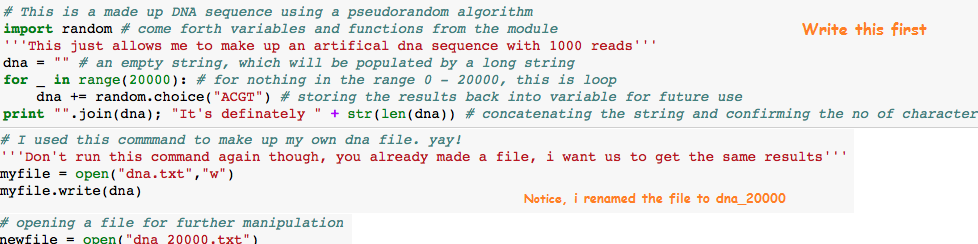

In [41]:
from IPython.display import Image
Image(filename='Replicate this in other IDEs -1.png') 

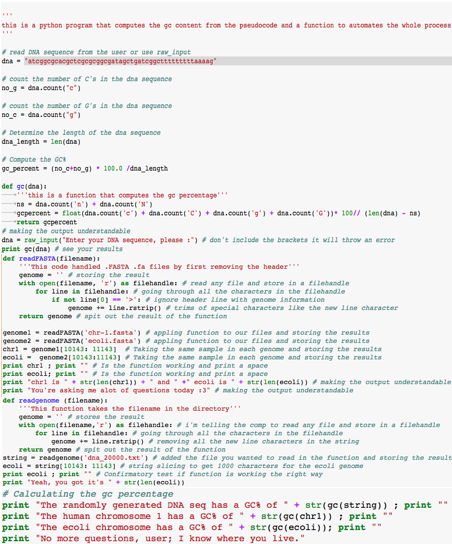

In [43]:
from IPython.display import Image
Image(filename='Replicate this in other IDE-2.png') 

We can use this metric to compare sequences across evolutionary time. This helps determine the similarity within and between species.

You can learn about that here: 

[Can Phylogenetics help us understand antimicrobial resistance?](https://github.com/Shuyib/Phylogenetic-tree-study/wiki)

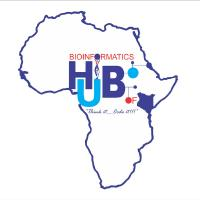

In [44]:
from IPython.display import Image
Image(filename='data/60731777.jpeg') 

Check out their website [https://bhki.org/](https://bhki.org/)

Need a refresher on jupyter notebooks? Check out this [tutorial](https://github.com/BioinfoNet/TeachingJupyterNotebooks).